<h1 align = "center"> Outlier Detection </h1>

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# My packages :) 
from preprocessing.outliers import remove_outliers_IQR , remove_outliers_STD

In [3]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [4]:
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
boston_df.shape

(506, 13)

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Univariate outlier analysis

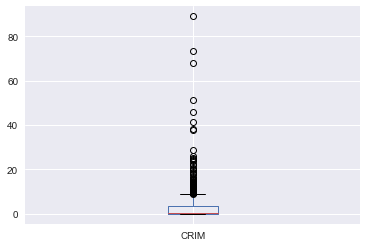

In [8]:
plt.figure()
boston_df.boxplot("CRIM")

Czy możemy zrobić multivariate analysis z boxplotami ? 
Tak jeżeli jedną osią będą zmienne ciągłe a drugą zmienne dyskretne 

# Multivariate outlier analysis

#### Scatter plot

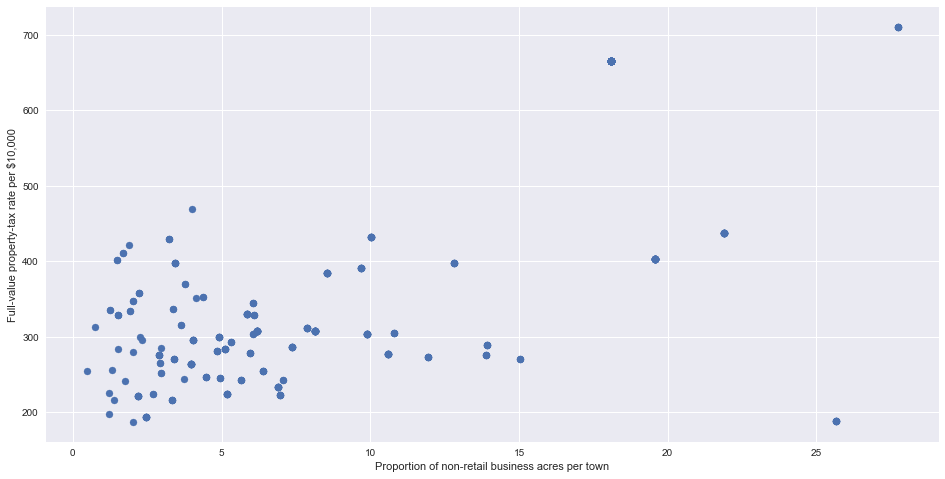

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Looking at the plot above, we can most of data points are lying bottom left side but there are points which are far from the population like top right corner.

# Wskaźniki do detekcji outlierów

## Z-Score

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.** Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution**.

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [11]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [12]:
print(z[55][1])

3.375038763517309


So, the data point — 55th record on column ZN is an outlier.

# IQR score 

In [13]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame(IQR).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.595038,12.5,12.91,0.0,0.175,0.738,49.05,3.08825,20.0,387.0,2.8,20.8475,10.005


In [14]:
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: Could not compare [None] with block values

# Working with Outliers: Correcting, Removing

In [ ]:
boston_df.shape

In [ ]:
df_boston_std = remove_outliers_STD(boston_df,treshold=2)

In [ ]:
df_boston_IQR = remove_outliers_IQR(boston_df,IQR_mul=2)

In [ ]:
df_boston_std.describe()

In [ ]:
df_boston_IQR.describe()